## Drug Classification Dataset

Kaggle link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification/code

Target Variable (y):

*   Drug Type

Feature Variables (x):

*   Age
*   Sex
*   Blood Pressure Levels (BP)
*   Cholesterol Levels
*   Na to Potassium Ratio


Import the Packages

In [ ]:
import numpy as np #working with matrixes and certain data types
import seaborn as sns #visualisation package
import matplotlib.pyplot as plt #visualisation package
import pandas as pd #dataframes and data analysis
%matplotlib inline

Importing the Dataset

In [ ]:
## Create a dataframe called df and read in the csv
df = pd.read_csv('drug200.csv')

# Exploratory Data Analysis

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.count()

Age            200
Sex            200
BP             200
Cholesterol    200
Na_to_K        200
Drug           200
dtype: int64

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
df['Na_to_K'].value_counts()

12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64

In [ ]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
df['Drug'].value_counts()


DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
df['Age'].value_counts()

Data Cleaning and Preparation



1.  convert columns to lower case



In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'sex', 'bp', 'cholesterol', 'na_to_k', 'drug'], dtype='object')

In [ ]:
df['drug'] = df['drug'].str.lower()
df['drug'] = df['drug'].str.replace('drug','')

In [ ]:
df['drug'].unique()

array(['y', 'c', 'x', 'a', 'b'], dtype=object)

In [ ]:
df['sex'] = df['sex'].str.lower()
df['bp'] = df['bp'].str.lower()
df['cholesterol'] = df['cholesterol'].str.lower()

In [ ]:
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,y
1,47,m,low,high,13.093,c
2,47,m,low,high,10.114,c
3,28,f,normal,high,7.798,x
4,61,f,low,high,18.043,y


# Data Visualisation

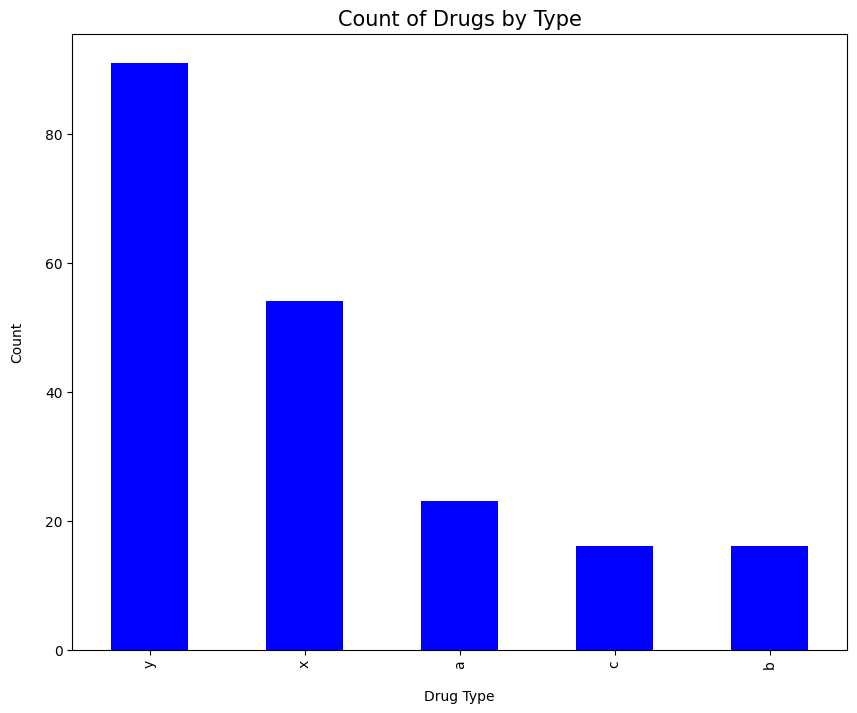

In [ ]:
# Bar Graph
df['drug'].value_counts().plot(kind='bar', figsize=(10,8), color='blue' )
plt.xlabel('Drug Type', labelpad = 15, fontsize=10)
plt.ylabel('Count', labelpad = 15, fontsize = 10)
plt.title('Count of Drugs by Type',y=1,fontsize=15)
plt.show()

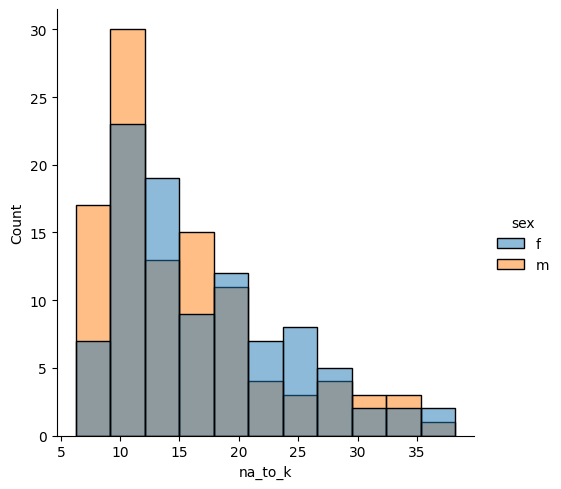

In [ ]:
# Distribution Plot
#sns.displot(df['na_to_k'])
sns.displot(data=df, x='na_to_k', hue = 'sex')

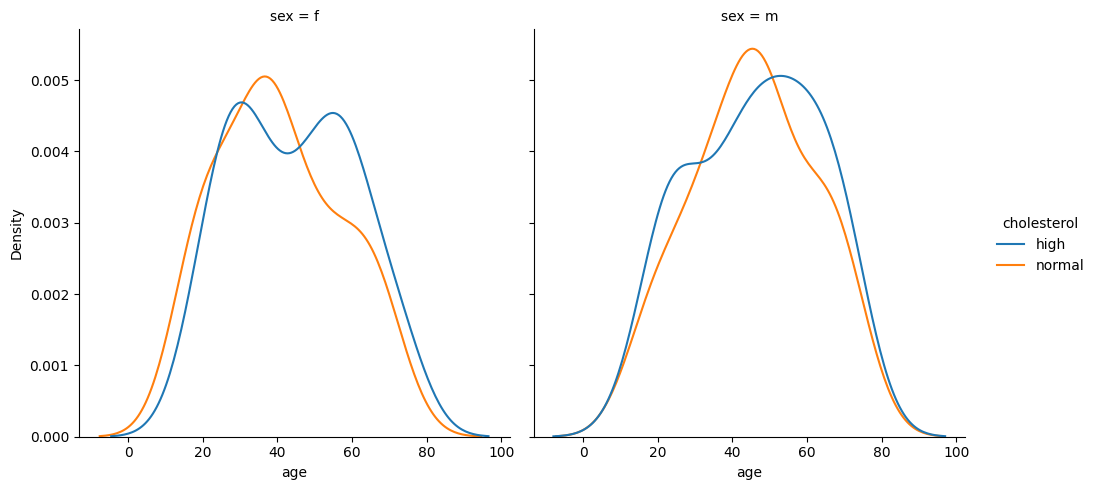

In [ ]:
sns.displot(data=df, x='age', hue = 'cholesterol', col='sex', kind='kde')

<Axes: xlabel='drug', ylabel='count'>

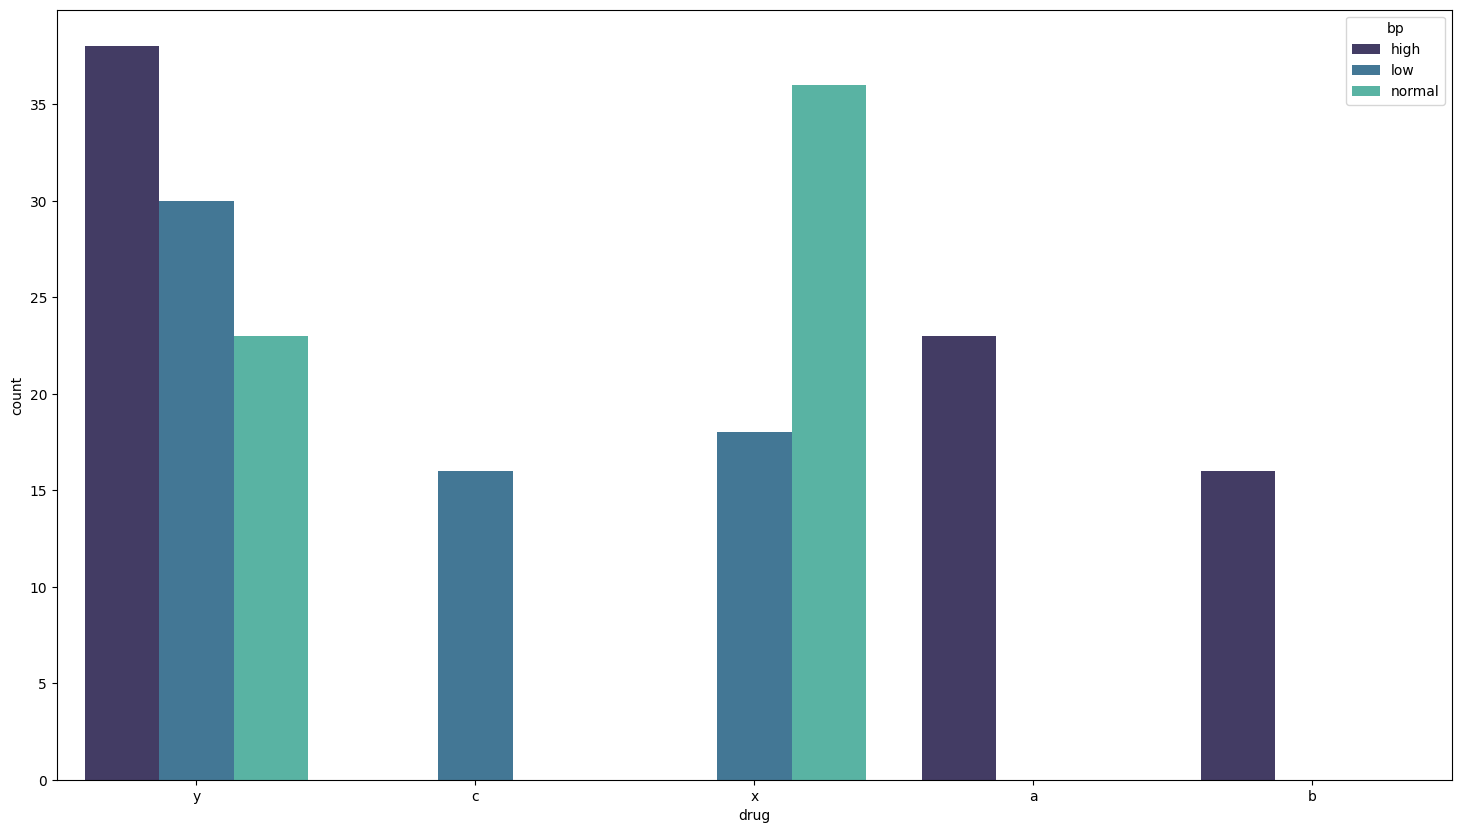

In [ ]:
#Countplot
plt.figure(figsize=(18,10))
sns.countplot(x=df['drug'], hue=df['bp'], palette='mako')

<Axes: xlabel='age', ylabel='cholesterol'>

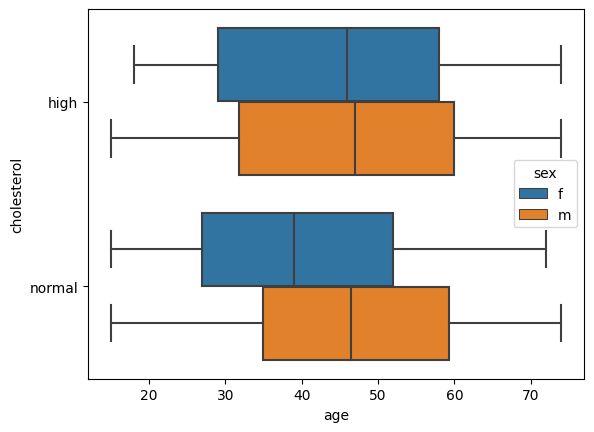

In [ ]:
#Box Plot
sns.boxplot(data = df, x='age', y='cholesterol', hue='sex')

[Text(0.5, 1.0, 'Cholesterol by Age and Drugs')]

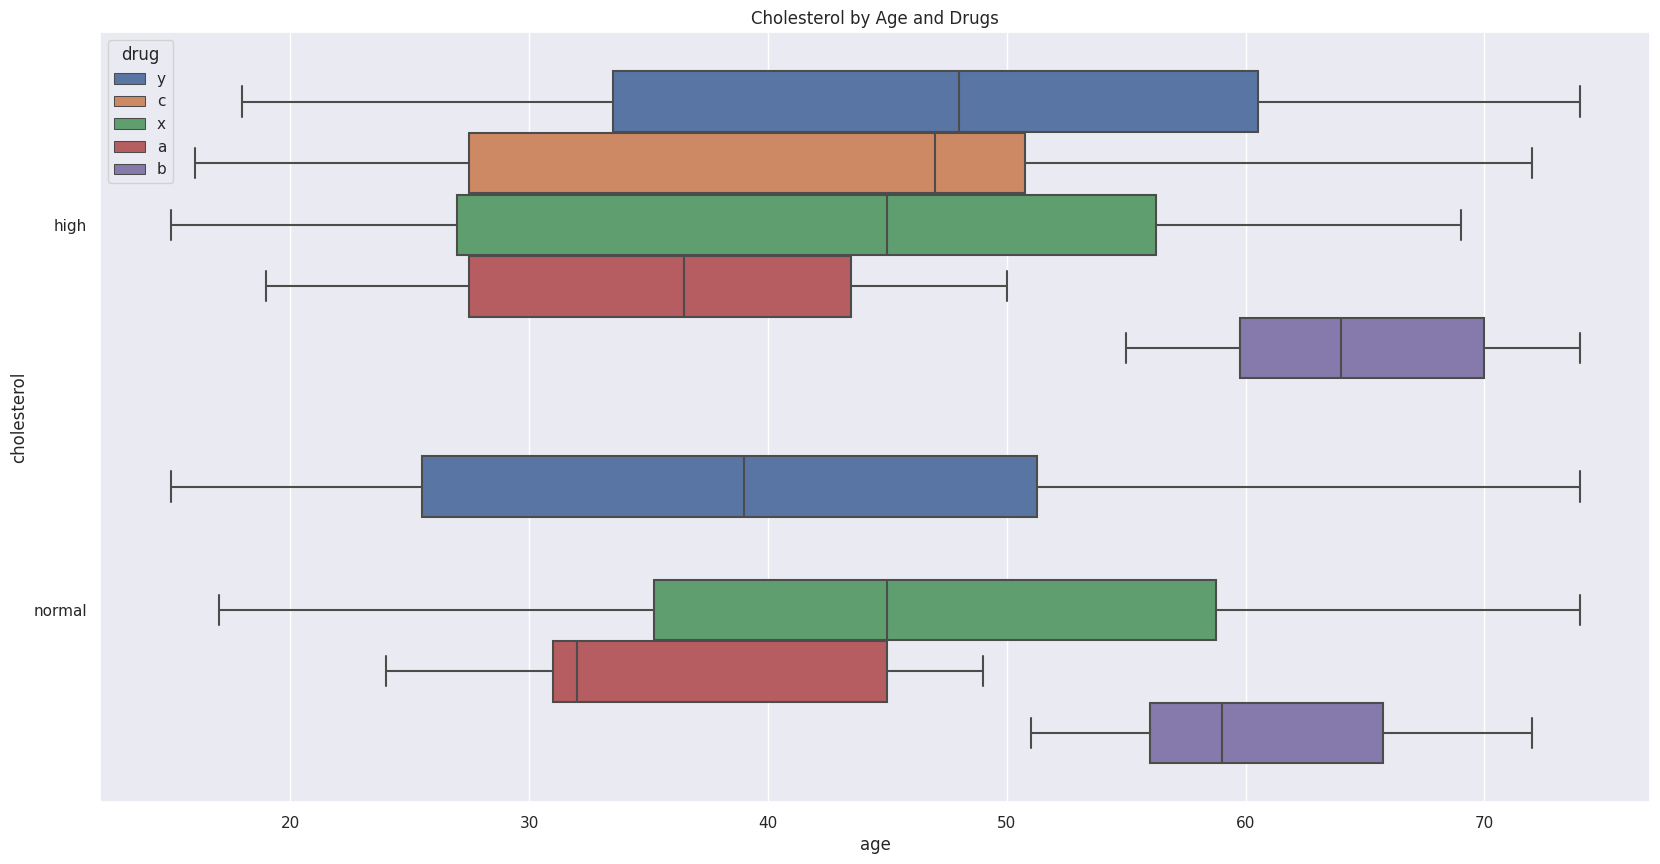

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data = df, x='age', y='cholesterol', hue='drug').set(title='Cholesterol by Age and Drugs')

<ipython-input-24-82698e5559c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


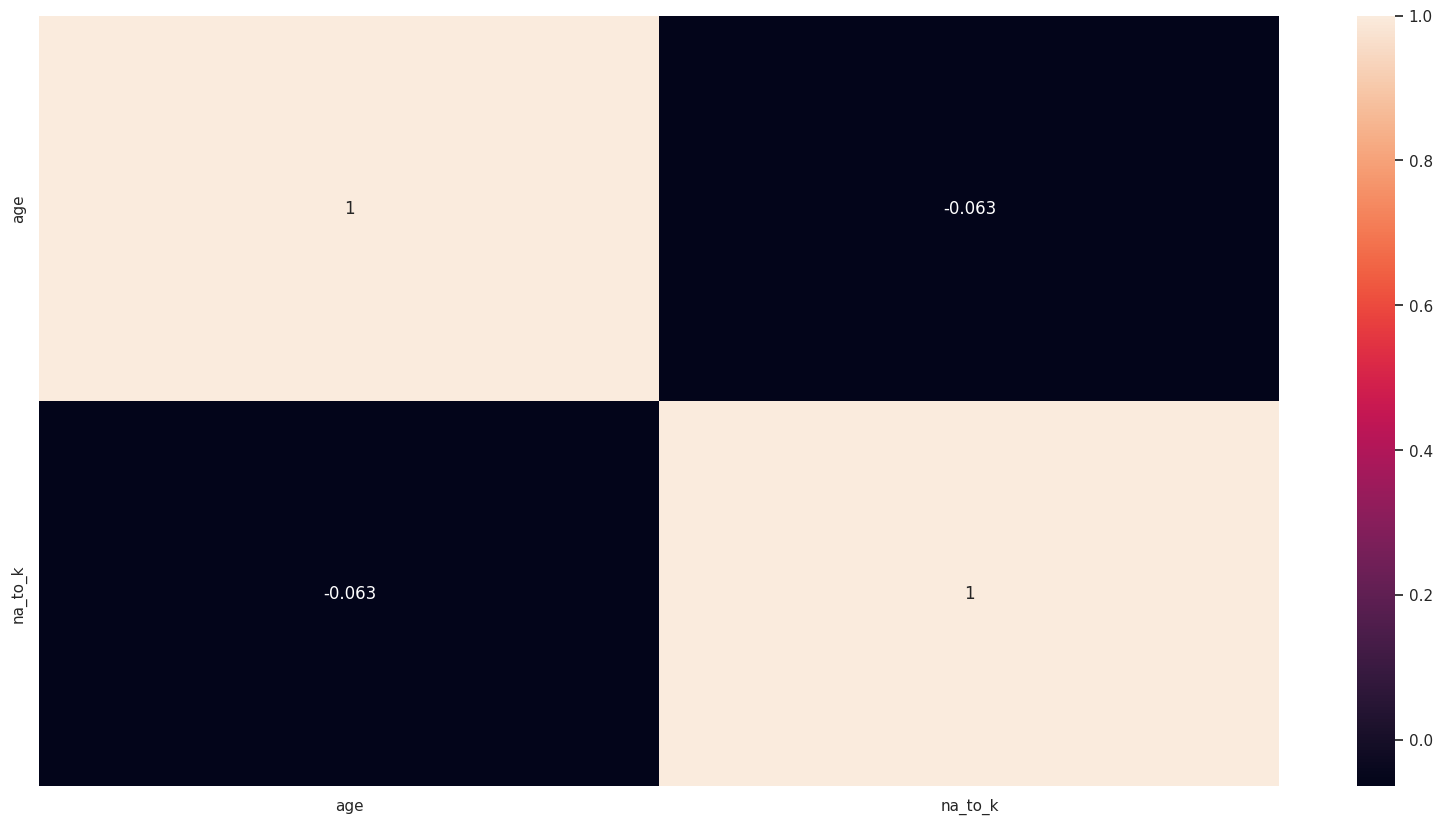

In [ ]:
#Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

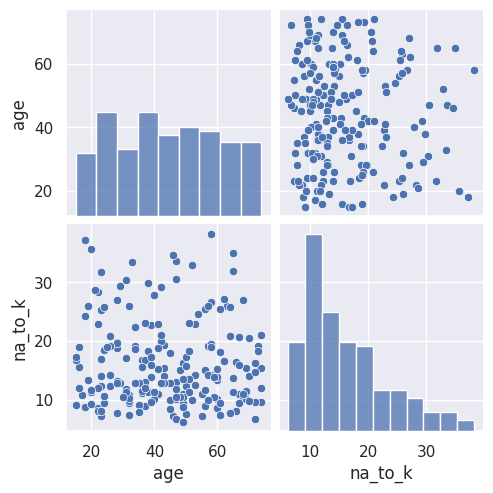

In [ ]:
sns.pairplot(df)

<Axes: xlabel='age', ylabel='na_to_k'>

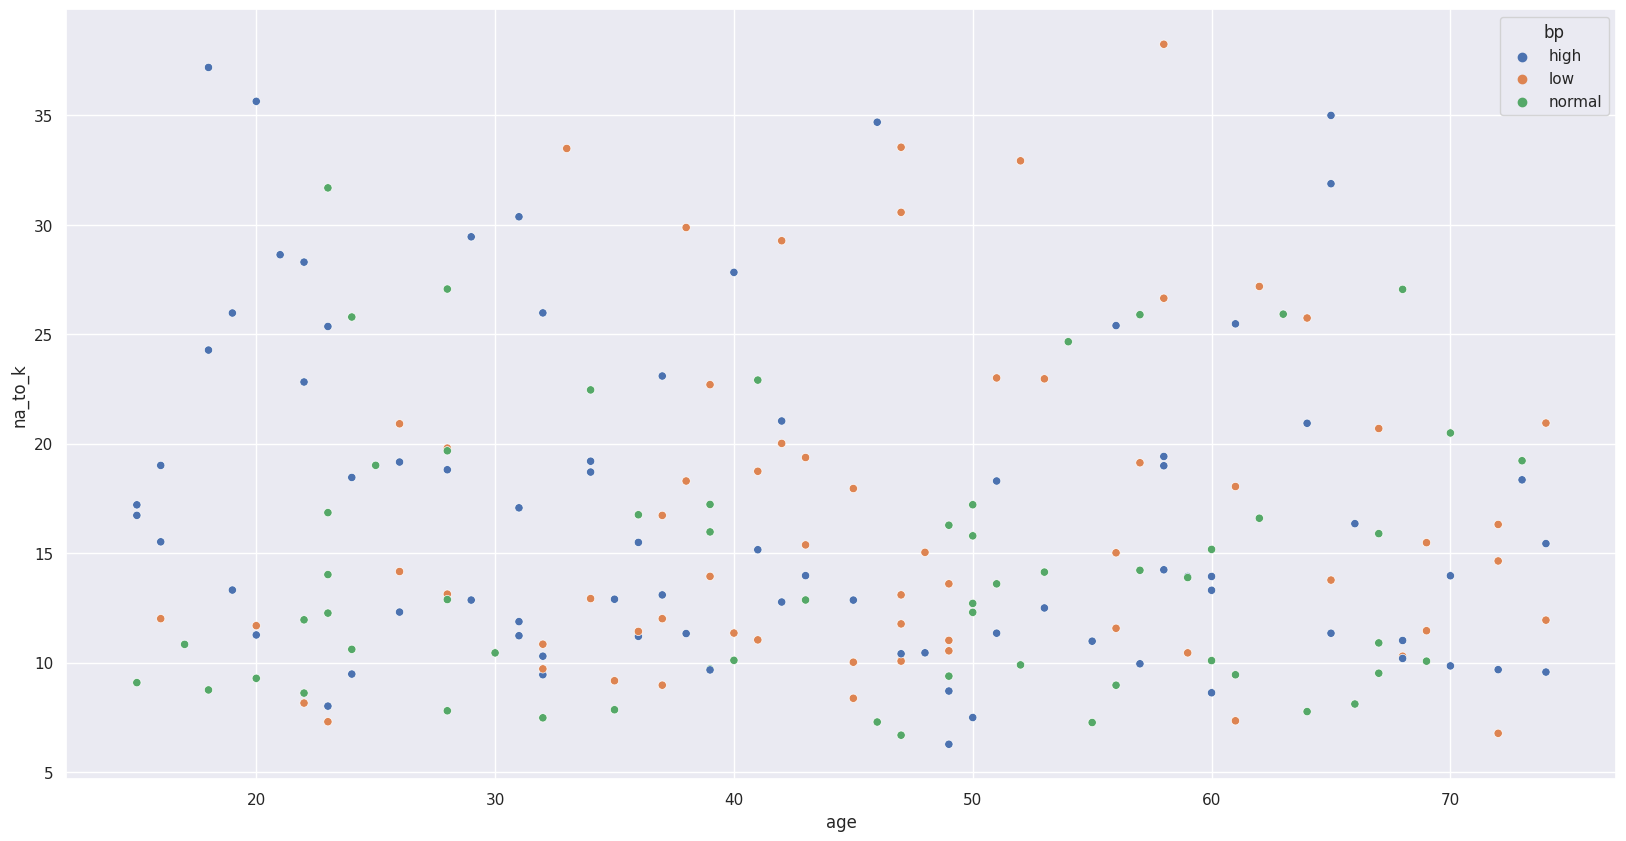

In [ ]:
#Scatter Plot
sns.scatterplot(data=df, x='age', y='na_to_k', hue='bp')

# Feature Engineering


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Create instance of the encoder
encoder = LabelEncoder()
#Fit and transform the the data
df['sex']=encoder.fit_transform(df['sex'])
df['cholesterol'] =encoder.fit_transform(df['cholesterol'])
df['bp']=encoder.fit_transform(df['bp'])

In [ ]:
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,0,0,25.355,y
1,47,1,1,0,13.093,c
2,47,1,1,0,10.114,c
3,28,0,2,0,7.798,x
4,61,0,1,0,18.043,y


# Regression Models

# Logistic Regression

In [ ]:
X=df.drop(['drug'], axis=1) #feature variables
y=df['drug'] # target variable

In [ ]:
from sklearn.model_selection import train_test_split

#Split data into training and test sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.linear_model import LogisticRegression #import the logistic regression module
logreg = LogisticRegression(random_state=7) #instantiate the model


In [ ]:
logreg.fit(X_train, y_train) # fit the model with the training data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=7)

In [ ]:
y_pred=logreg.predict(X_test) # perform prediction on the test data
y_pred

array(['x', 'y', 'y', 'y', 'c', 'c', 'y', 'y', 'a', 'x', 'b', 'y', 'a',
       'y', 'y', 'c', 'y', 'y', 'x', 'y', 'y', 'x', 'b', 'y', 'b', 'y',
       'y', 'x', 'y', 'y', 'y', 'x', 'x', 'c', 'b', 'a', 'y', 'y', 'a',
       'x'], dtype=object)

In [ ]:
#Model Evaluation
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 1,  0,  0,  0,  3],
       [ 3,  3,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  1,  0,  0, 17]])

In [ ]:
print((logreg.score(X_test, y_test)*100),'%')

82.5 %


Text(140.75, 0.5, 'Predicted label')

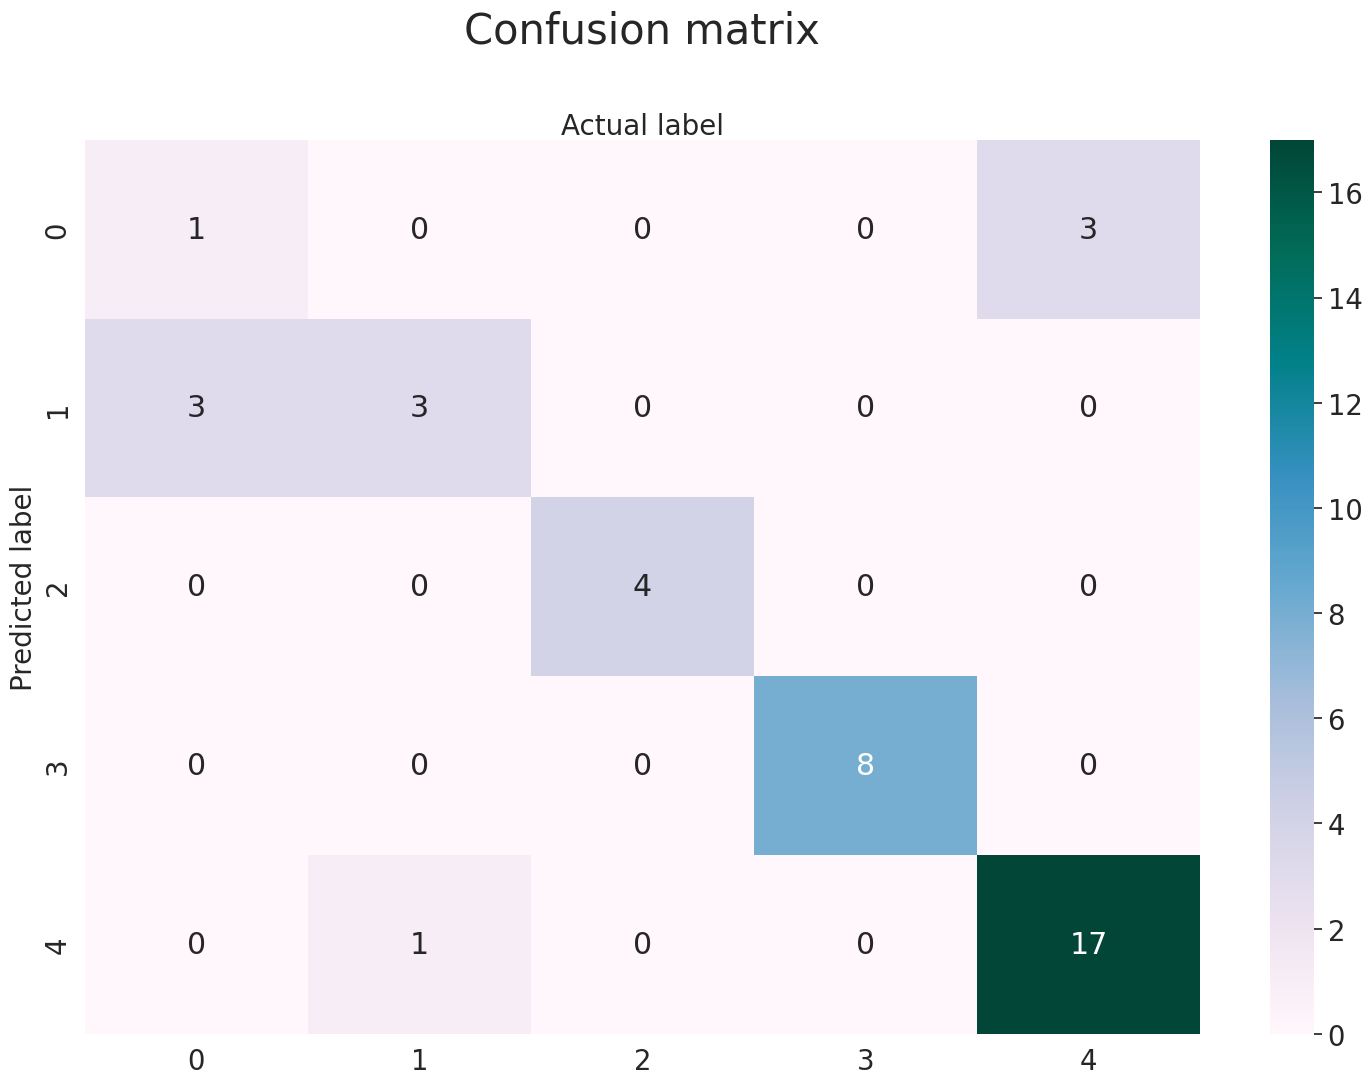

In [ ]:
#Visualise Confusion Matrix by Heatmap
class_names = ['a','b','c','x','y'] #name of classes
fig, ax = plt.subplots(figsize=(15,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='PuBuGn', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize = 30)
plt.xlabel('Actual label', fontsize=20)
plt.ylabel('Predicted label', fontsize=20)


In [ ]:
#Confusion Matrix Evaluation Metrics
from sklearn.metrics import classification_report
target_names = ['a','b','c','x','y']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           a       0.25      0.25      0.25         4
           b       0.75      0.50      0.60         6
           c       1.00      1.00      1.00         4
           x       1.00      1.00      1.00         8
           y       0.85      0.94      0.89        18

    accuracy                           0.82        40
   macro avg       0.77      0.74      0.75        40
weighted avg       0.82      0.82      0.82        40



* Classification accuracy = 82%
* Precision (weighted average) = 82%
* Recall (Weighted average) = 82%

In [ ]:
from sklearn import metrics
#ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label = 'Logistic Regression(area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ValueError: ignored

AUC score =

# Classifier Models

# KNN (Supervised)

In [ ]:
X=df.drop(['drug'], axis=1) #feature variables
y=df['drug'] # target variable

In [ ]:
from sklearn.model_selection import train_test_split

#Split data into training and test sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
#Scale the features using Standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Train the model and fit training data
#Start with arbitrary chosen value of n_neighbours = 5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) #create instance
knn.fit(X_train, y_train) # fit training data


KNeighborsClassifier()

In [ ]:
#Make Predictions
y_pred = knn.predict(X_test)

In [ ]:
#Evaluate model using accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('KNN Accuracy =', accuracy*100, '%')

KNN Accuracy = 80.0 %


In [ ]:
#Using Cross Validation to get the best k value
from sklearn.model_selection import cross_val_score
k_values = [i for i in range(1,51)] #select a tange of values for k to loop through
                                    #range() function is exclusive of the endpoint
scores = [] #create an empty list to store results
scalar = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, y, cv=7) #Model splits data into 5 equal sized groups (4 train and 1 test)
  scores.append(np.mean(score))

In [ ]:
print(len(k_values), len(scores))

50 50


Text(0, 0.5, 'Accuracy Score')

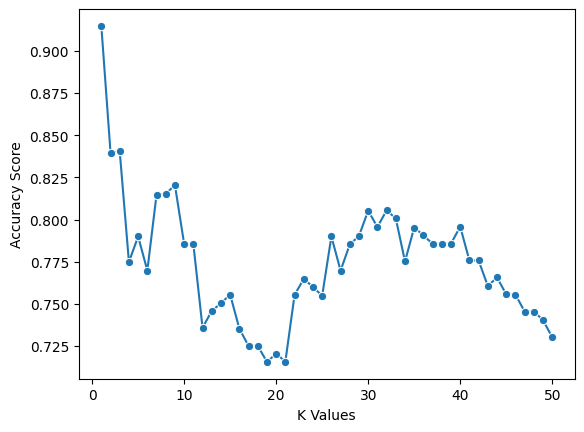

In [ ]:
#Plot the results
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Accuracy Score')


Training Using Best k

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print('Best k =', best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

Best k = 1


KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Evaluate accuracy, precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

print("Accuracy:", accuracy, '%')
print("Precision:", precision, '%')
print("Recall:", recall, '%')


Accuracy: 0.825
Precision: 0.8638095238095238
Recall: 0.825


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
X=df.drop(['drug'], axis=1) #feature variables
y=df['drug'] # target variable

In [ ]:
from sklearn.model_selection import train_test_split

#Split data into training and test sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
#Create decision tree classifier object
clf = DecisionTreeClassifier(random_state=7)
# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)
#Predict on test data
y_pred = clf.predict(X_test)

In [ ]:
#Evaluate the model accuracy - i.e. how often is the classifier correct?
accuracy= metrics.accuracy_score(y_test,y_pred)
print('Accuracy =', accuracy)

Accuracy = 0.95


In [ ]:
#Gives the classes
#Syntax: name_of_model.classes_
clf.classes_

array(['a', 'b', 'c', 'x', 'y'], dtype=object)

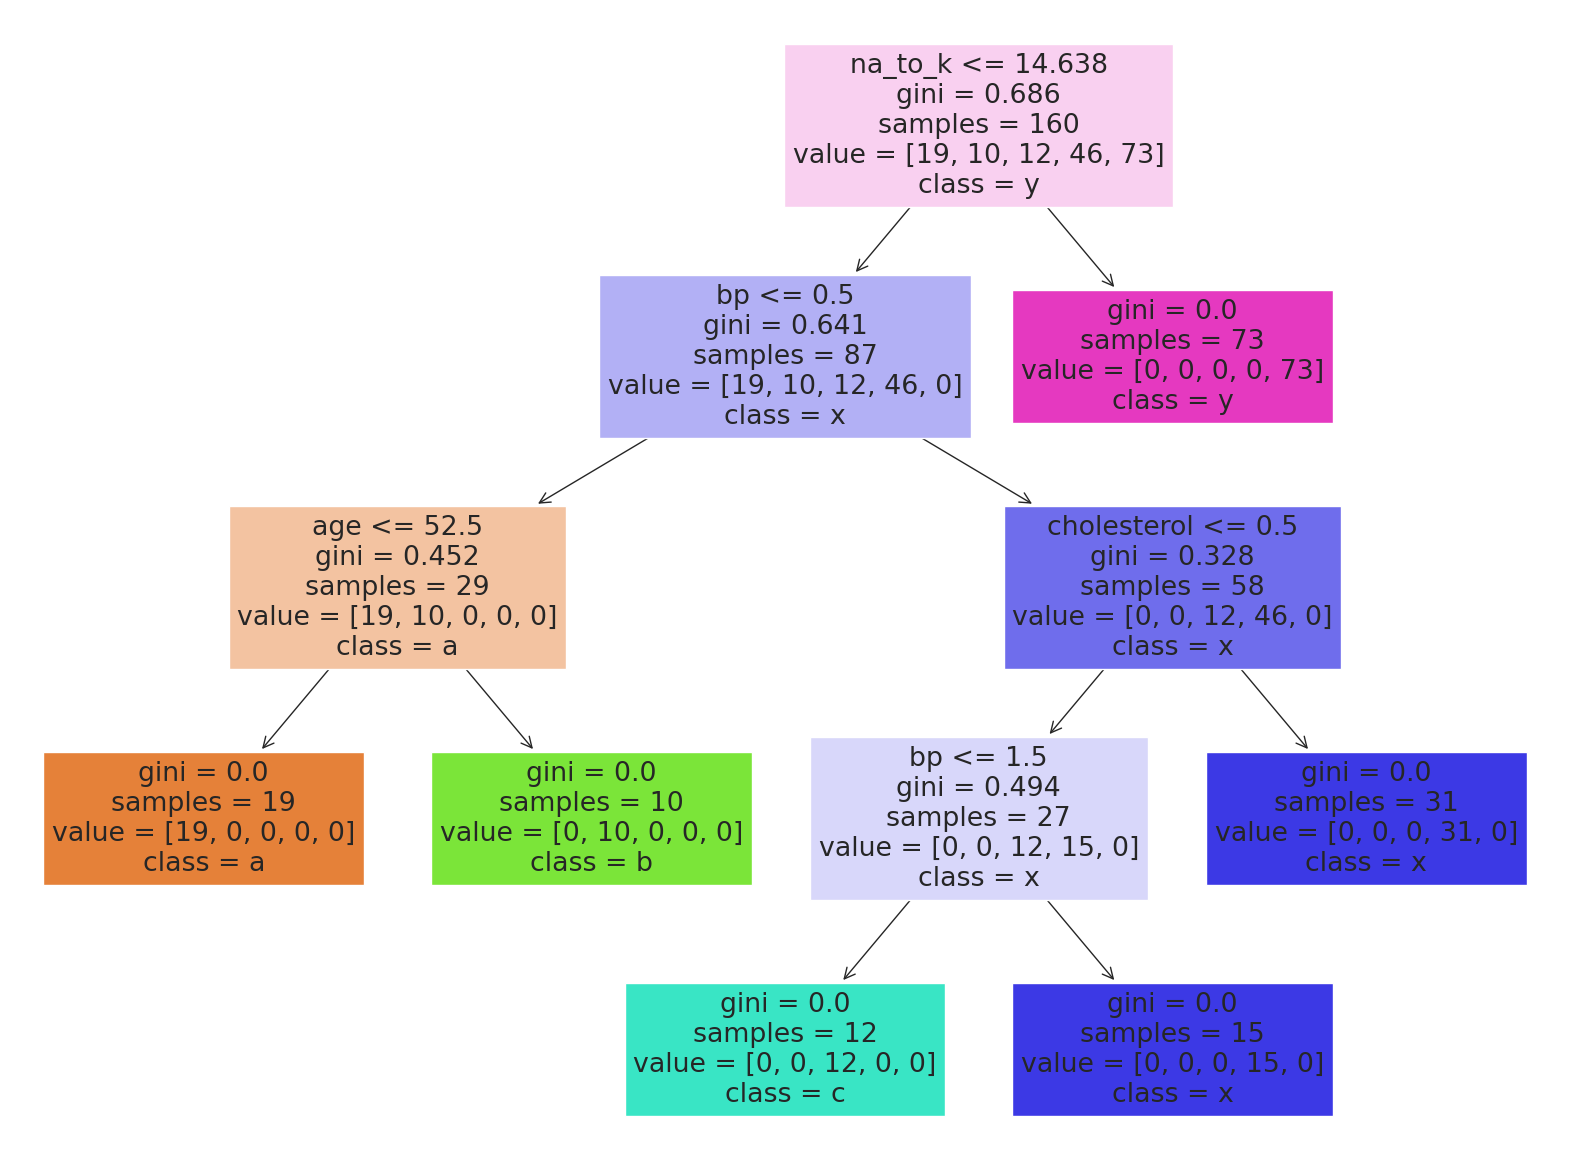

In [ ]:
from sklearn import tree
#Visualise decision tree
fig = plt.figure(figsize=(20,15))
tree = tree.plot_tree(clf, class_names=clf.classes_, filled=True, feature_names=X.columns)

In [ ]:
#Optimise Tree Performace by 'pruning':
# - criterion
# - splitter
# - max_depth

#Create decision tree classifier object
clf_opt = DecisionTreeClassifier(random_state=7,
                             criterion = 'gini',
                             splitter = 'best',
                             max_depth = 4)
# Train Decision Tree Classifier
clf_opt = clf_opt.fit(X_train, y_train)
#Predict on test data
y_pred_opt = clf_opt.predict(X_test)

#Evaluate the model accuracy - i.e. how often is the classifier correct?
accuracy_opt = metrics.accuracy_score(y_test,y_pred_opt)
print('Accuracy =', accuracy_opt)

Accuracy = 0.95


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
X=df.drop(['drug'], axis=1) #feature variables
y=df['drug'] # target variable

In [ ]:
from sklearn.model_selection import train_test_split

#Split data into training and test sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =', accuracy*100, '%')

Accuracy = 97.5 %


In [ ]:
#Hyperparameter Tuning

param_dist = {'n_estimators': randint(50,500), #number of decision tree in the forest
              'max_depth': randint(1,20)} #mmaximum depth of each decision tree in the forest

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f98ac4ccd00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f98ac4cf280>})

In [ ]:
#Create a vairable for the best model
best_rf = rand_search.best_estimator_

#Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 288}


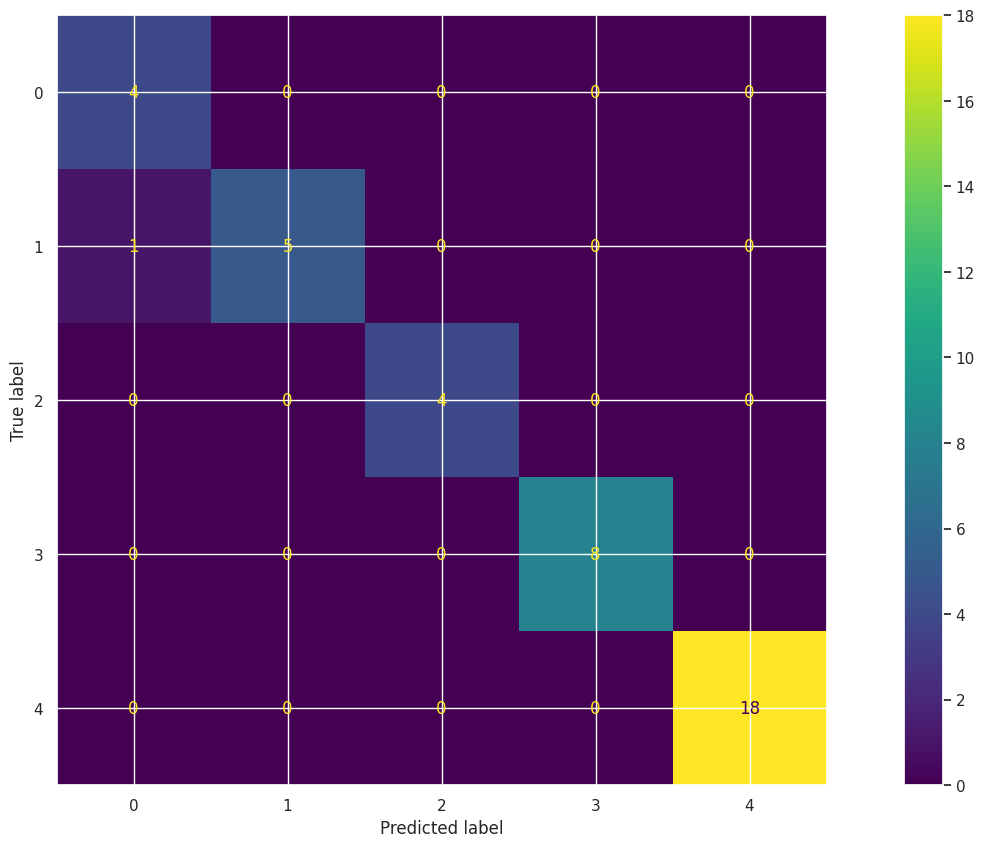

In [ ]:
#Evaluation Metrics

#Generate predictions with the best model
y_pred = best_rf.predict(X_test)

#create confusion matrix
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,  average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.975
Precision: 0.9800000000000001
Recall: 0.975


In [ ]:
#Create a series containing feature importances from the model and featre names from the trainng data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

<Axes: >

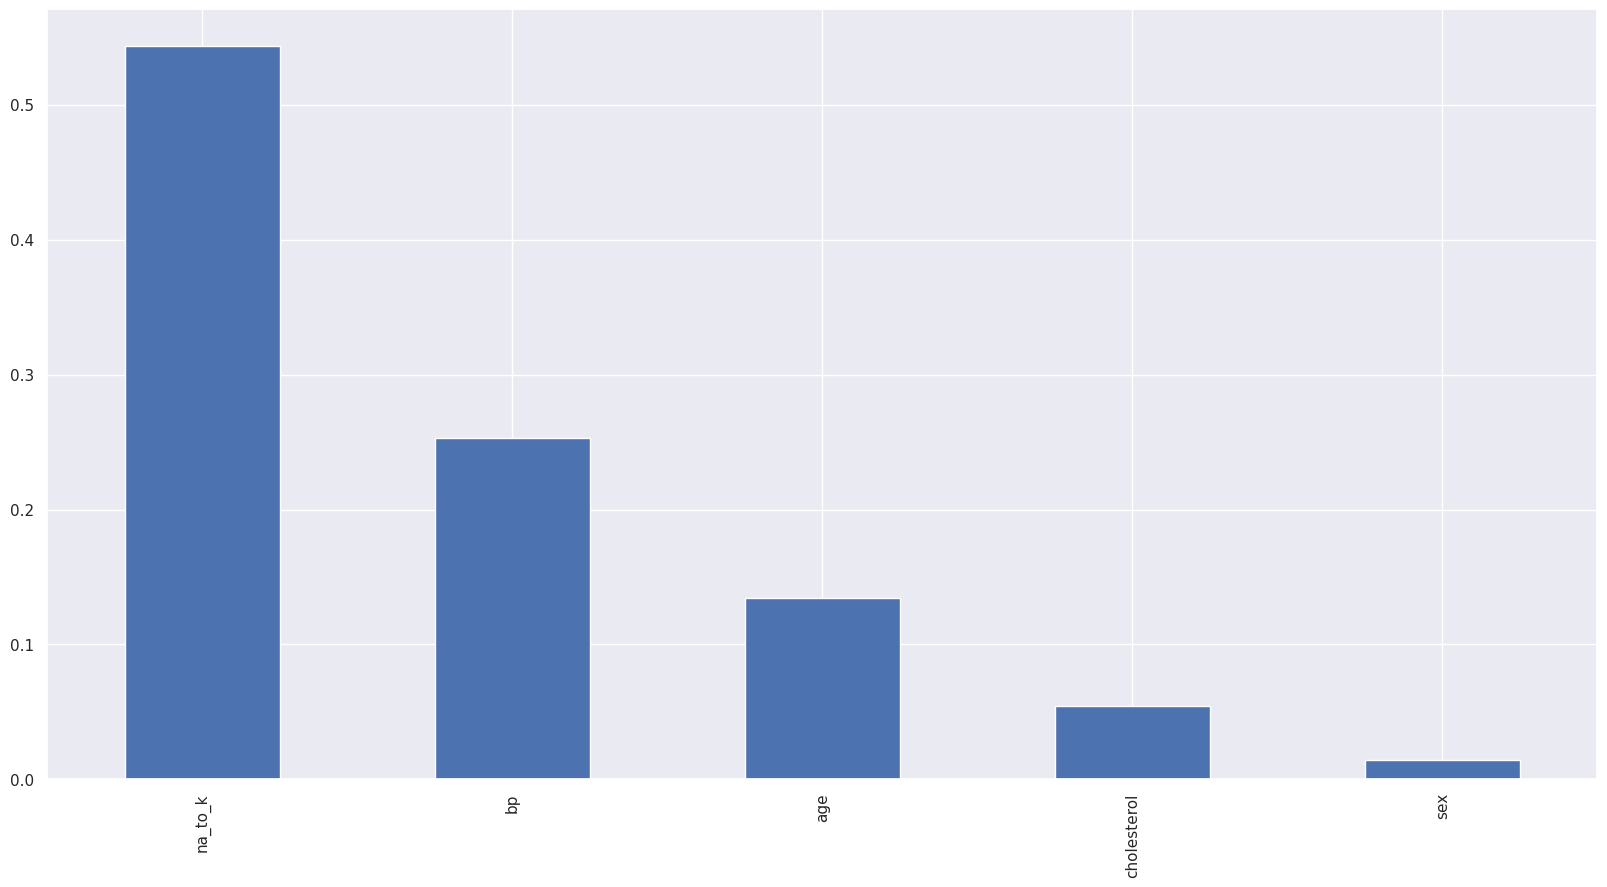

In [ ]:
feature_importances.plot.bar()

# Support Vector Machines

# Naive Bayes

# Linear SVC